In [1]:
# For Colab
# !git clone https://github.com/trevor-yu-087/syde-599-f23-tutorial.git
# DATA_PATH = "syde-599-f23-tutorial/data/logistic-regression-data.pkl"

In [1]:
import torch
import pickle
import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm

In [2]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [3]:
with open("data/logistic-regression-data.pkl", "rb") as f:
    data = pickle.load(f)

In [4]:
data.keys()

dict_keys(['training_x', 'training_y', 'validation_x', 'validation_y'])

# Section 1: Logistic Regression with Scikit-Learn
In this tutorial, we will use scikit-learn Linear Regression to do binary classification. The goal is again to get familiar with the typical machine learning workflow.

In [5]:
# By convention, 2D data (matrices) uses capital letters, while 1D data (vectors) uses lower case letters
X_train = data["training_x"]
y_train = data["training_y"]
X_val = data["validation_x"]
y_val = data["validation_y"]

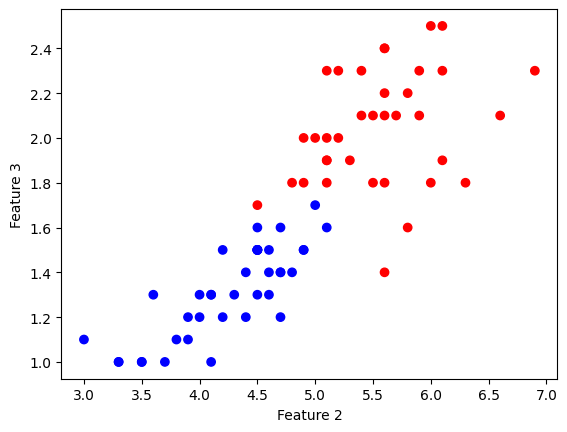

In [6]:
# TODO: Plot features at index 2 and 3
plt.scatter(X_train[:, 2], X_train[:, 3], c=y_train, cmap='bwr')
plt.xlabel("Feature 2")
plt.ylabel("Feature 3")
plt.show()

[Scikit-learn Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [7]:
from sklearn.linear_model import LogisticRegression

# TODO: Instantiate model
model = LogisticRegression()

In [8]:
# TODO: Fit model on training data
model.fit(X_train, y_train)

LogisticRegression()

In [9]:
# TODO: Score model on the training and validation sets
train_acc = model.score(X_train, y_train)
val_acc = model.score(X_val, y_val)

print(f"Training accuracy: {train_acc*100:.2f}%")
print(f"Validation accuracy: {val_acc*100:.2f}%")

Training accuracy: 94.67%
Validation accuracy: 92.00%


In [10]:
# TODO: Get the probabilities for class 0 and class 1
probs = model.predict_proba(X_train)

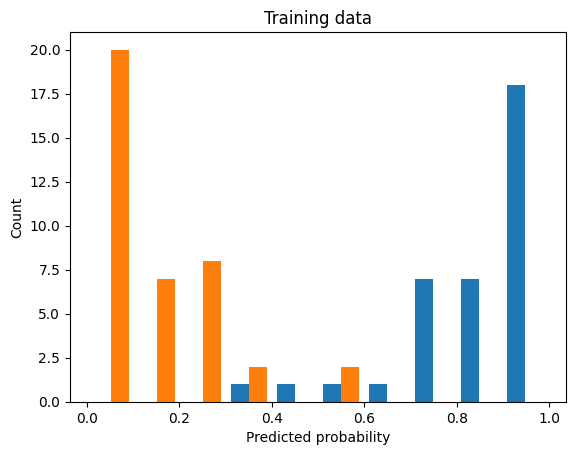

In [11]:
# TODO: Plot the class 0 probabilities against the class 1 probabilities

probs = probs[:, 1]
true_probs = probs[y_train == 1]
false_probs = probs[y_train == 0]

plt.hist([true_probs, false_probs], bins=10)
plt.xlabel('Predicted probability')
plt.ylabel('Count')
plt.title('Training data')
plt.show()

In [12]:
# TODO: Plot the probabilities for the validation data
probs_val = model.predict_proba(X_val)
probs_val = probs_val[:, 1]
true_probs_val = probs_val[y_val == 1]
false_probs_val = probs_val[y_val == 0]

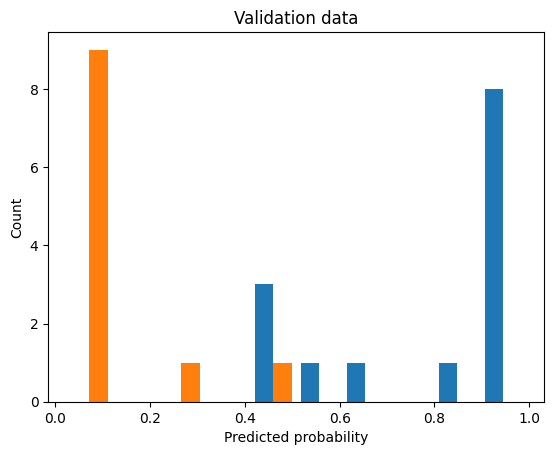

In [13]:
plt.hist([true_probs_val, false_probs_val], bins=10)
plt.xlabel('Predicted probability')
plt.ylabel('Count')
plt.title('Validation data')
plt.show()

# Section 2: Logistic Regression in Torch

This section is optional, but provided to get a sense of how torch can be used to the same kind of model, but with more upfront work. If you have familiarity with torch, try to code up logistic regression on your own!

In [14]:
from torch import nn
from sklearn.metrics import accuracy_score

class LogReg(nn.Module):
    def __init__(self, num_features=2):
        super().__init__()
        # TODO: Setup linear layer for the model
        # Input dimension is 2 (2 features); output dimension is 1 (binary output)
        self.linear = nn.Linear(num_features, 1)

    def forward(self, x):
        # TODO: Apply logistic regression model in forward
        x = self.linear(x)
        x = torch.sigmoid(x)
        return x

In [15]:
# Must convert data to torch FloatTensor for neural networks
X_train = torch.FloatTensor(X_train)
y_train = torch.FloatTensor(y_train.astype(np.float32)).unsqueeze(-1)

In [41]:
# TODO: Setup loss function for logistic regression
loss_function = nn.BCELoss()
#####
NUM_STEPS = 200
model = LogReg(X_train.shape[-1])
optimizer = torch.optim.SGD(model.parameters(), lr=1e-1)

In [42]:
# TODO: Complete the training loop, pass all the training data each step
losses = []
accs = []

for i in tqdm(range(NUM_STEPS)):
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = loss_function(outputs, y_train)
    
    # Back prop
    loss.backward()
    losses.append(loss.item())
    acc = accuracy_score(torch.round(outputs.detach()), y_train)
    accs.append(acc)

    # Update weights and biases
    optimizer.step()

100%|██████████| 200/200 [00:00<00:00, 1318.99it/s]


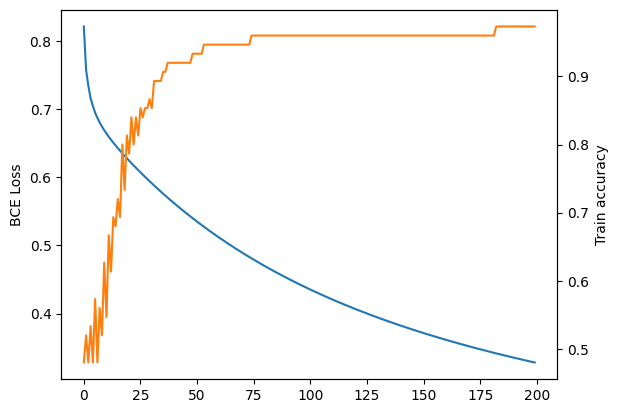

In [43]:
# Plot the training curves, final accuracy should be comparable to sklearn model
plt.plot(losses)
plt.ylabel("BCE Loss")
plt.twinx()
plt.plot(accs, c="C1")
plt.ylabel("Train accuracy")
plt.show()